In [221]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [222]:
features = pd.read_csv('data/training_set_features.csv')

In [223]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [224]:
label = pd.read_csv('data/training_set_labels.csv')

In [225]:
label.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [226]:
df = features.merge(label, on='respondent_id', how='inner')

In [227]:
print(df.shape)

(26707, 38)


In [228]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [229]:
def df_summary(df):
    
    print(f"Dataset Shape: {df.shape}")
    
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    
    summary = summary.reset_index()
    
    summary['Name'] = summary['index']
    
    summary = summary[['Name','dtypes']]
    
    summary['Uniques'] = df.nunique().values
    
    summary['Missing Count'] = df.isnull().sum().values
    
    summary['Missing Percentage'] = df.isnull().sum().values/len(df)
    
    summary['Missing Percentage'] = summary['Missing Percentage'].map("{:.2%}".format)
    
    for name in summary['Name'].value_counts().index:
        
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [230]:
df_summary(df)

Dataset Shape: (26707, 38)


,Name,dtypes,Uniques,Missing Count,Missing Percentage,Entropy
0,respondent_id,int64,26707,0,0.00%,14.70
1,h1n1_concern,float64,4,92,0.34%,1.86
2,h1n1_knowledge,float64,3,116,0.43%,1.33
3,behavioral_antiviral_meds,float64,2,71,0.27%,0.28
4,behavioral_avoidance,float64,2,208,0.78%,0.85
5,behavioral_face_mask,float64,2,19,0.07%,0.36
6,behavioral_wash_hands,float64,2,42,0.16%,0.67
7,behavioral_large_gatherings,float64,2,87,0.33%,0.94
8,behavioral_outside_home,float64,2,82,0.31%,0.92
9,behavioral_touch_face,float64,2,128,0.48%,0.91


# **We will analyse the dataset to identify:**

#### 1. Labels proportion
#### 2. Missing values
#### 3. Numerical variables
#### 4. Distribution of the numerical variables
#### 5. Outliers
#### 6. Categorical variables
#### 7. Cardinality of the categorical variables
#### 8. Potential relationship between the variables and labels

# Starting the EDA

#### 1. Labels proportion 

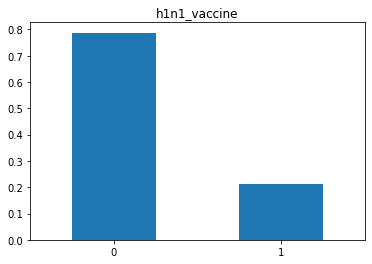

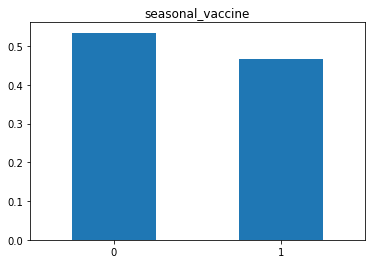

In [231]:
for i in ['h1n1_vaccine', 'seasonal_vaccine']:
    
    df[i].value_counts().div(len(df)).plot(kind='bar')
    
    plt.title(i)
    
    plt.xticks(rotation=0)
    
    plt.show()

#### 2. Missing values

In [232]:
vars_with_na = [var for var in df.columns if df[var].isna().sum() > 0]

df[vars_with_na].head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,< 12 Years,Below Poverty,Not Married,Own,Not in Labor Force,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,12 Years,Below Poverty,Not Married,Rent,Employed,0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,College Graduate,"<= $75,000, Above Poverty",Not Married,Own,Employed,2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,12 Years,Below Poverty,Not Married,Rent,Not in Labor Force,0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,Some College,"<= $75,000, Above Poverty",Married,Own,Employed,1.0,0.0,wxleyezf,emcorrxb


In [233]:
def analyse_na_value_rate(df, var, target, ax=None):

    df = df.copy()

    df[var] = np.where(df[var].isnull(), 1, 0)

    total = pd.pivot_table(data=df, index=df[var], columns=df[target], values='respondent_id', aggfunc='count')
    
    row_total = total.sum(axis='columns')
    
    row_share = total.div(row_total, axis='index')
    
    row_share.plot(kind='bar', stacked=True, ax=ax)
    
    ax.set(title=var)
    
    ax.set_xlabel("Missing data", fontsize=10, labelpad=-15)
    
    ax.tick_params(labelrotation=0)

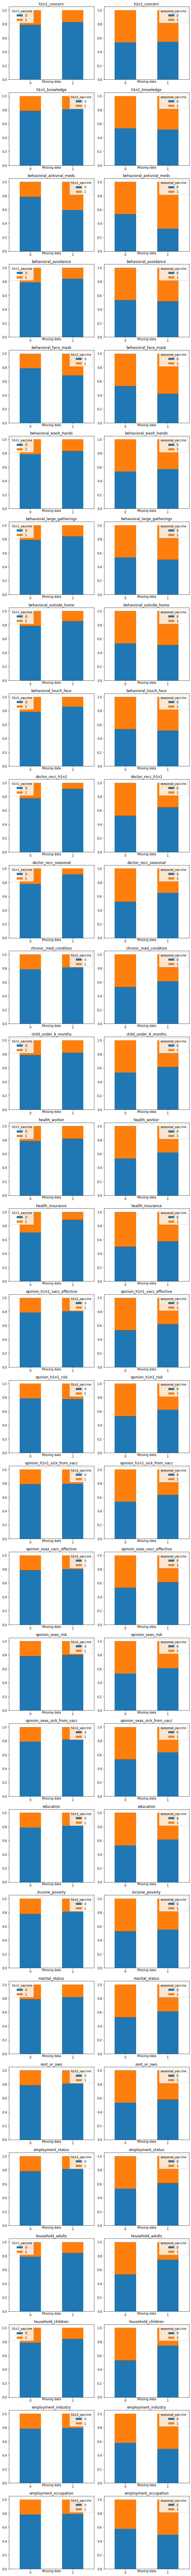

In [234]:
fig, ax = plt.subplots(len(vars_with_na), 2, figsize=(9, len(vars_with_na)*4))

for idx, var in enumerate(vars_with_na):
    
    analyse_na_value_rate(df, var, target='h1n1_vaccine', ax=ax[idx, 0])
    
    analyse_na_value_rate(df, var, target='seasonal_vaccine', ax=ax[idx, 1])
    
    fig.tight_layout()

#### 3. Numerical variables

In [235]:
vars_with_num = [var for var in df.columns if df[var].dtype != 'O' and var not in ['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

df[vars_with_num].head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


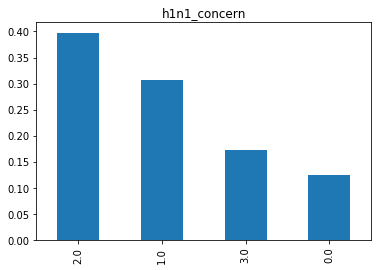

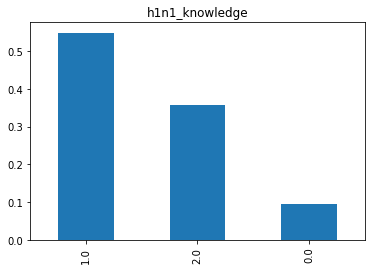

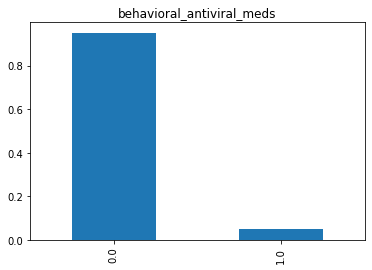

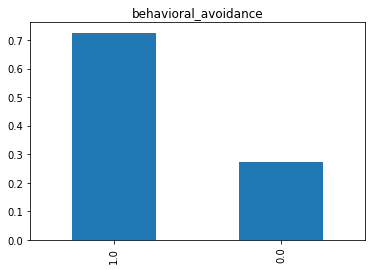

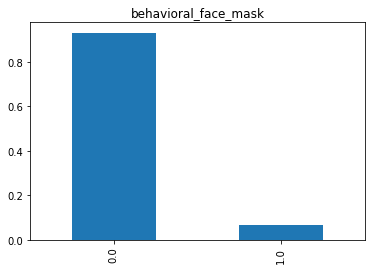

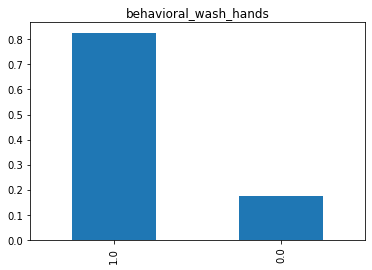

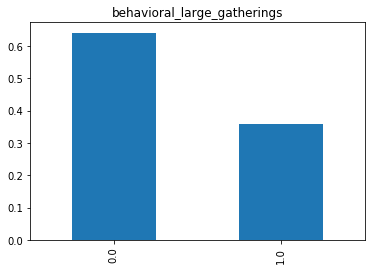

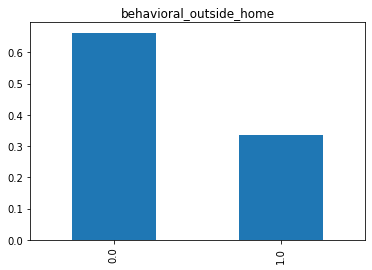

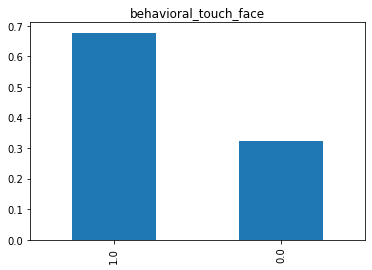

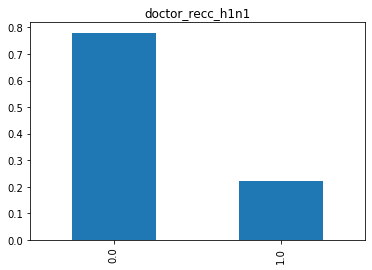

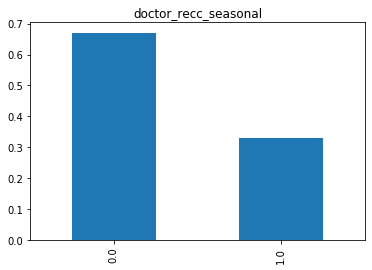

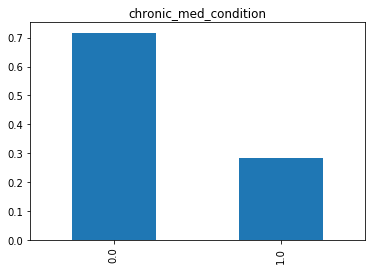

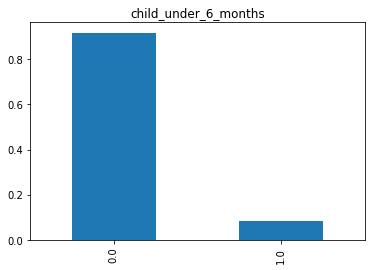

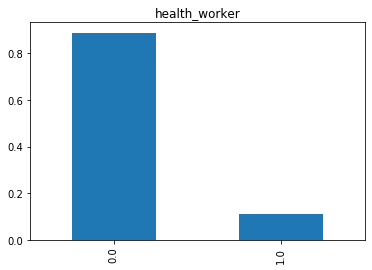

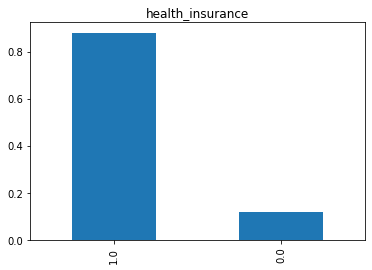

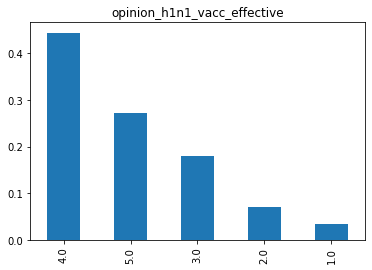

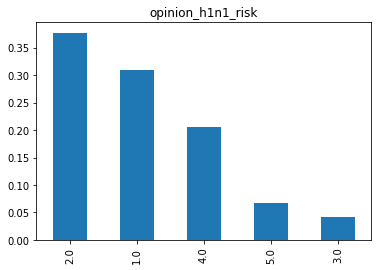

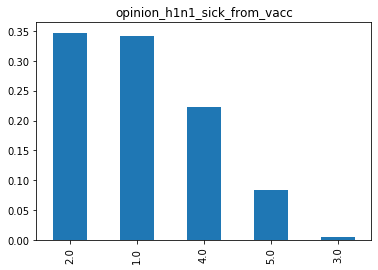

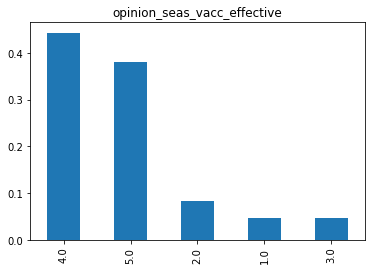

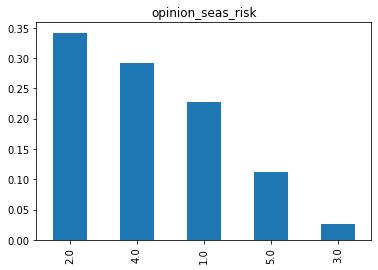

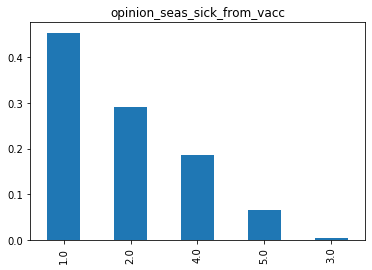

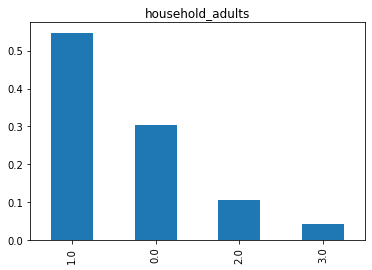

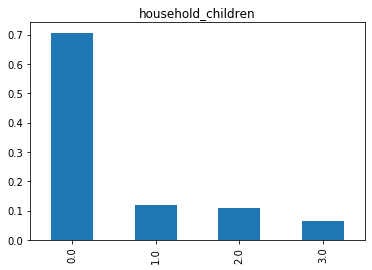

In [236]:
def analyse_value_counts(df, var):
    
    df = df.copy()

    df[var].value_counts(normalize=True).plot(kind='bar')
    
    plt.title(var)
    
    plt.show()


for var in vars_with_num:
    analyse_value_counts(df, var)

In [237]:
def analyse_num_value_rate(df, var, target, ax=None):

    df = df.copy()

    total = pd.pivot_table(data=df, index=df[var], columns=df[target], values='respondent_id', aggfunc='count')
    
    row_total = total.sum(axis='columns')
    
    row_share = total.div(row_total, axis='index')
    
    row_share.plot(kind='bar', stacked=True, ax=ax)
    
    ax.set(title=var)
    
    ax.set_xlabel(xlabel='')
    
    ax.tick_params(labelrotation=0)

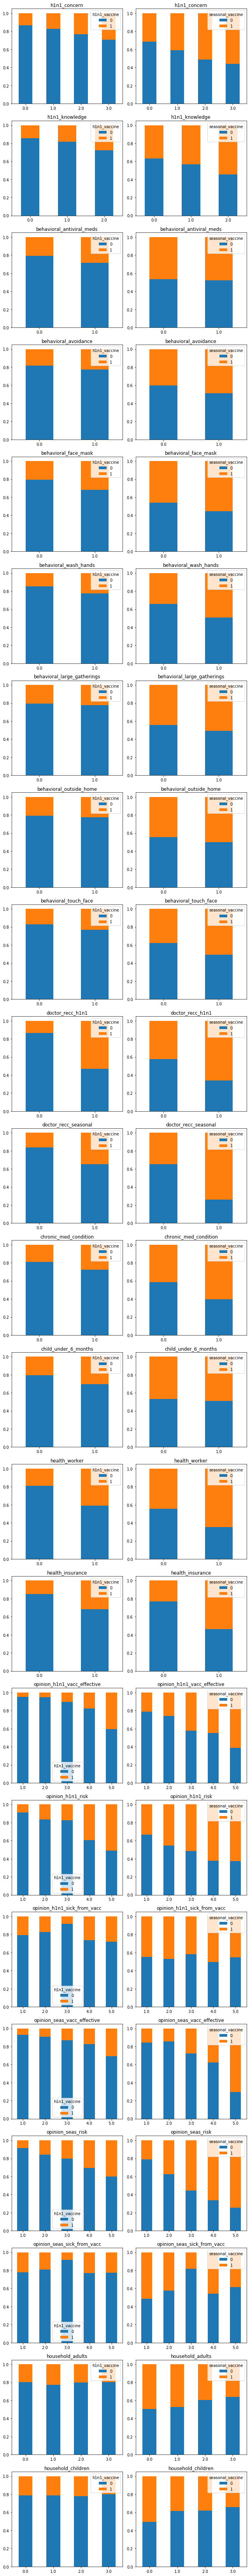

In [238]:
fig, ax = plt.subplots(len(vars_with_num), 2, figsize=(9, len(vars_with_num)*4))

for idx, var in enumerate(vars_with_num):
    
    analyse_num_value_rate(df, var, target='h1n1_vaccine', ax=ax[idx, 0])
    
    analyse_num_value_rate(df, var, target='seasonal_vaccine', ax=ax[idx, 1])
    
    fig.tight_layout()

#### 6. Categorical variables

In [239]:
vars_with_cat = [var for var in df.columns if df[var].dtype == 'O']

df[vars_with_cat].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


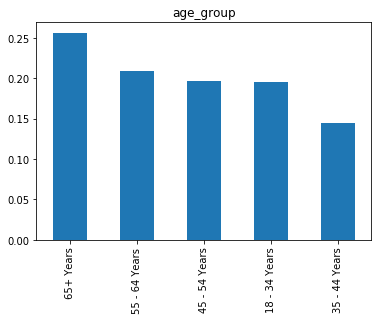

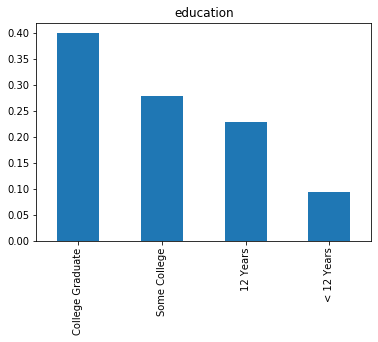

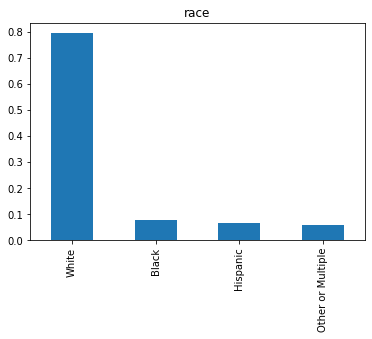

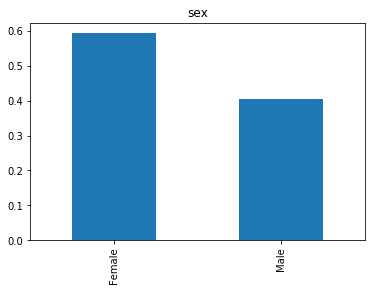

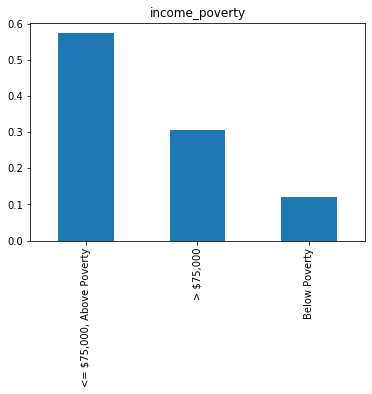

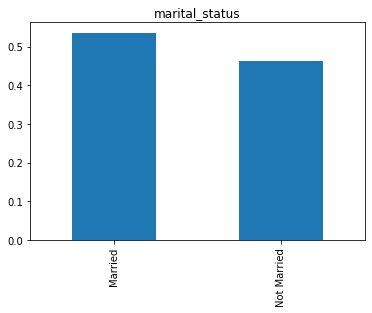

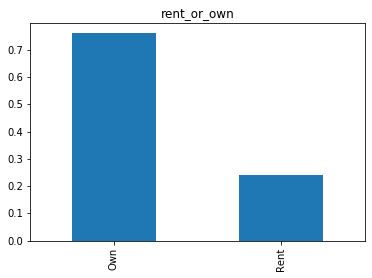

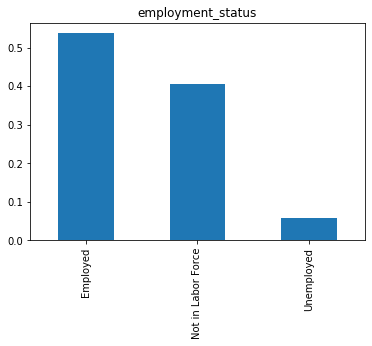

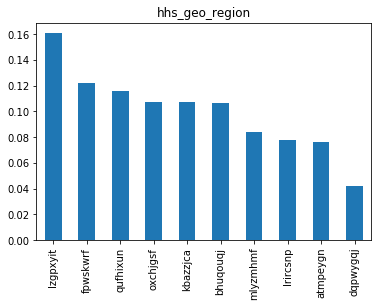

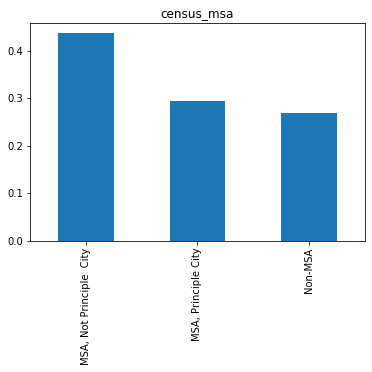

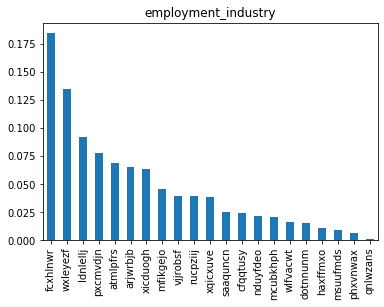

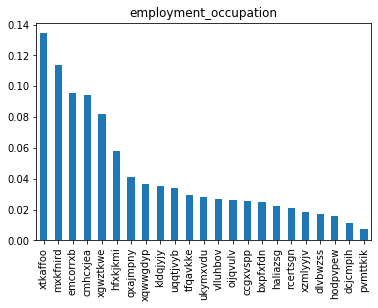

In [240]:
def analyse_value_counts(df, var):
    
    df = df.copy()

    df[var].value_counts(normalize=True).plot(kind='bar')
    
    plt.title(var)
    
    plt.show()


for var in vars_with_cat:
    analyse_value_counts(df, var)

In [241]:
def analyse_cat_value_rate(df, var, target, ax=None):

    df = df.copy()

    total = pd.pivot_table(data=df, index=df[var], columns=df[target], values='respondent_id', aggfunc='count')
    
    row_total = total.sum(axis='columns')
    
    row_share = total.div(row_total, axis='index')
    
    row_share.plot(kind='bar', stacked=True, ax=ax)
    
    ax.set(title=var)
    
    ax.set_xlabel(xlabel='')
    
    ax.tick_params(labelrotation=90)

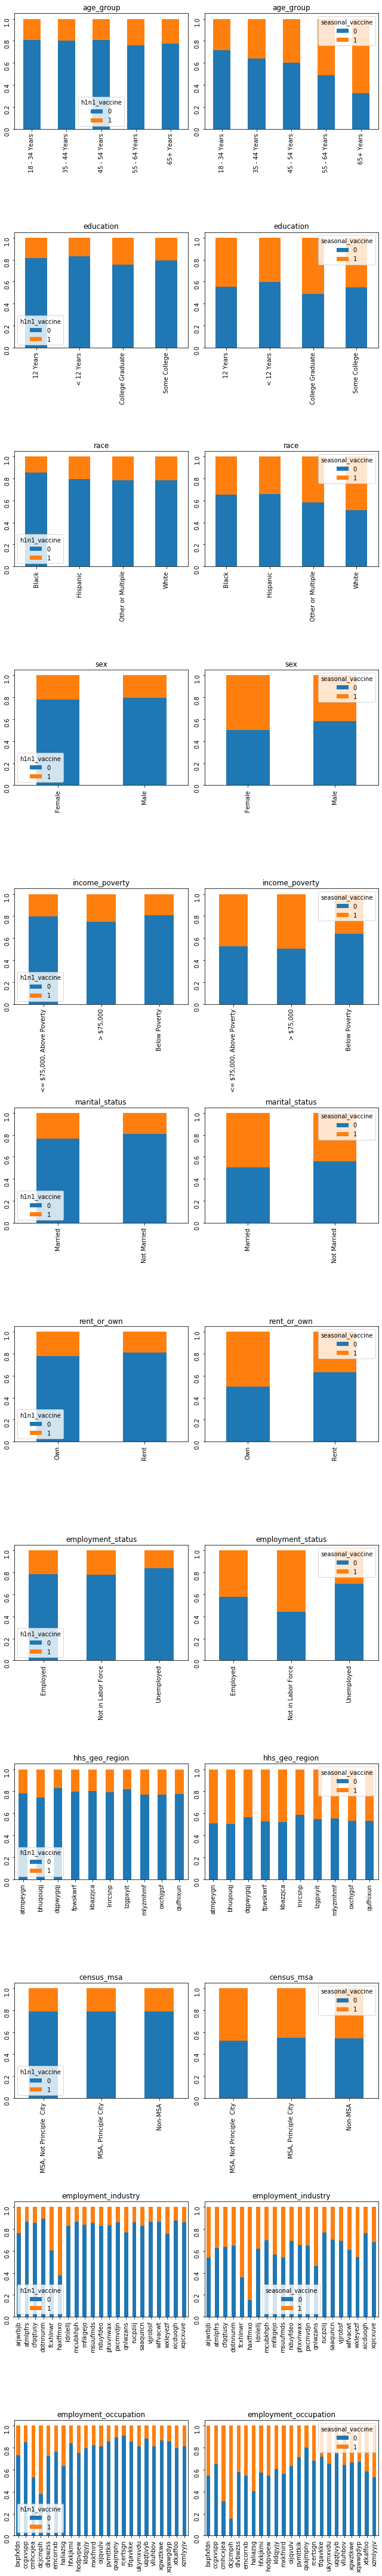

In [242]:
fig, ax = plt.subplots(len(vars_with_cat), 2, figsize=(9, len(vars_with_cat)*5))

for idx, var in enumerate(vars_with_cat):
    
    analyse_cat_value_rate(df, var, target='h1n1_vaccine', ax=ax[idx, 0])
    
    analyse_cat_value_rate(df, var, target='seasonal_vaccine', ax=ax[idx, 1])
    
    fig.tight_layout()

In [243]:
def analyse_rare_labels(df, var, rare_perc):
    
    df = df.copy()

    tmp = df.groupby(var)['respondent_id'].count() / len(df)

    if np.sum(tmp[tmp < rare_perc]) > 0:
        
        return tmp[tmp < rare_perc]


for var in vars_with_cat:
    print(analyse_rare_labels(df, var, 0.01))
    print()

None

None

None

None

None

None

None

None

None

None

employment_industry
dotnnunm    0.007526
haxffmxo    0.005542
msuufmds    0.004643
phxvnwax    0.003332
qnlwzans    0.000487
wlfvacwt    0.008050
Name: respondent_id, dtype: float64

employment_occupation
dcjcmpih    0.005542
dlvbwzss    0.008500
hodpvpew    0.007788
pvmttkik    0.003669
xzmlyyjv    0.009286
Name: respondent_id, dtype: float64



#### 7. Cardinality of the categorical variables

In [244]:
df[vars_with_cat].nunique()

age_group                 5
education                 4
race                      4
sex                       2
income_poverty            3
marital_status            2
rent_or_own               2
employment_status         3
hhs_geo_region           10
census_msa                3
employment_industry      21
employment_occupation    23
dtype: int64

#### 8. Potential relationship between the variables and labels

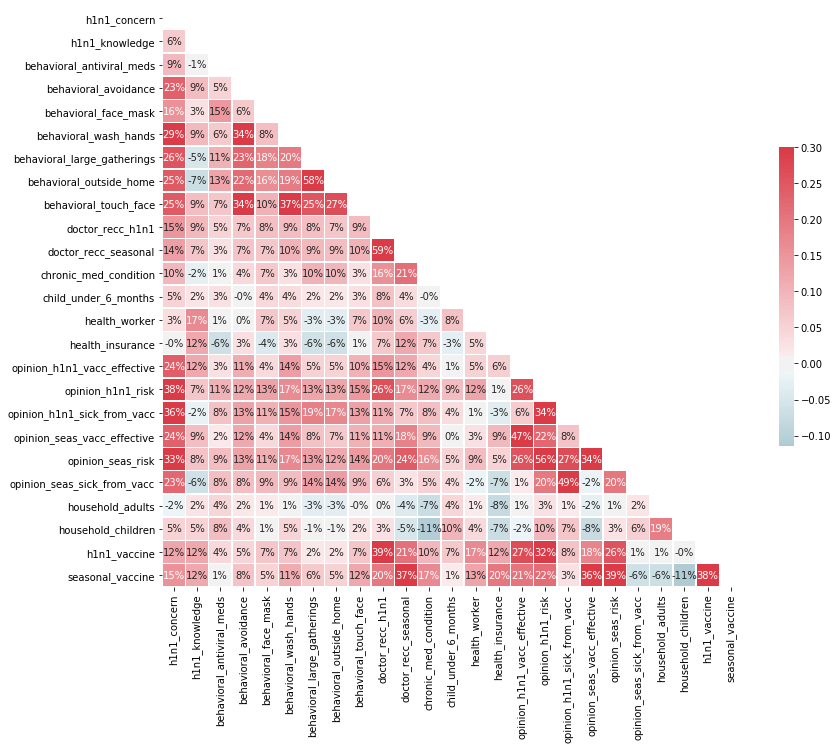

In [267]:
corr = df.iloc[:,1:].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt='.0%',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()